# Iris Dataset

The Iris flower data set was introduced by the british statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day.
![title](images/iris.png)
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Two of the three species were collected in the Gaspé Peninsula, all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

## Dataset Types
One of the key feature of the iris dataset is that it is a multivariate dataset, so let's try to define univariate, bivariate data and contrast it to multivariate data.  

### Univariate Data
Univariate data refers to "one variable" (one type of data), for example the following set of numbers represents travel time (hours): 0.25, 0.48, 0.13, 0.7, 0.58, 0.35, 0.3, 0.7, 0.43.

Since this set of numbers have no relationship with another set, usually is called the domain of an independent variable. An independent variable is that which one considers the causal variable, the prior variable (temporally prior or just theoretically prior), or the variable on which one has data from which to make predictions.

It is very common to represent this data arranging its elements in ascending order on an axis. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
val = 0. # this is the value where the data will appear on the y-axis.
travel_time = [0.25, 0.48, 0.13, 0.7, 0.58, 0.35, 0.3, 0.43] # travel time (hours) set represented by an array
travel_time = np.sort(travel_time) # sort travel_time array
travel_time

array([0.13, 0.25, 0.3 , 0.35, 0.43, 0.48, 0.58, 0.7 ])

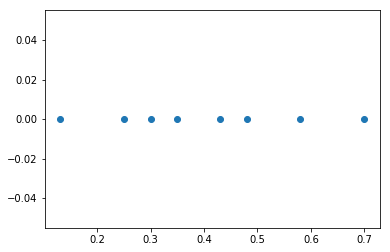

In [2]:
plt.plot(travel_time, np.zeros_like(travel_time) + val, 'o')
plt.show()

#### Descriptive statistics
One-variable datasets can be characterized not only by dots on a line, but also with values that give us idea of how the data is. Descriptive statistics, in short, help to describe and understand the features of a specific data set by giving short summaries about the sample and measures of the data. The most recognized types of descriptive statistics are the mean, median, and mode, which are used at almost all levels of math and statistics. However, there are less-common types of descriptive statistics that are still very important.

##### Measures of Descriptive Statistics
All descriptive statistics are either measures of central tendency or measures of variability. These two measures use graphs, tables, and general discussions to help people understand the meaning of the analyzed data.
Measures of central tendency describe the center position of a distribution for a data set. A person analyzes the frequency of each data point in the distribution and describes it using the mean, median, or mode, which measures the most common patterns of the analyzed data set.  
Measures of variability, or the measures of spread, aid in analyzing how spread-out the distribution is for a set of data. For example, while the measures of central tendency may give a person the average of a data set, it does not describe how the data is distributed within the set. So, while the average of the data may be 65 out of 100, there can still be data points at both 1 and 100. Measures of variability help communicate this by describing the shape and spread of the data set. Range, quartiles, absolute deviation, and variance are all examples of measures of variability.

So let's calculate some of these aggregates for our sample set of travel time

In [3]:
mean = np.mean(travel_time)
median = np.median(travel_time)

range_of_values = np.ptp(travel_time)
variance = np.var(travel_time)
standard_deviation = np.std(travel_time)

mean, median, range_of_values, variance, standard_deviation, 

(0.4024999999999999, 0.39, 0.57, 0.029693749999999998, 0.17231874535290698)

### Bivariate Data
Now let's take a look at bivariate data. Bivariate means "two variables", in other words there are two types of data.

Following the previous example let's say that we not only keep track of the time travelled but also the distance travelled when we looked at the time.

In [4]:
distance = [10.67, 24, 25, 26, 37, 38, 42, 56] # in kilometers
import pandas as pd
data = {'travel time': travel_time,
        'distance': distance}
travel = pd.DataFrame(data, columns=['travel time', 'distance'])
travel

,travel time,distance
0,0.13,10.67
1,0.25,24.00
2,0.30,25.00
3,0.35,26.00
4,0.43,37.00
5,0.48,38.00
6,0.58,42.00
7,0.70,56.00


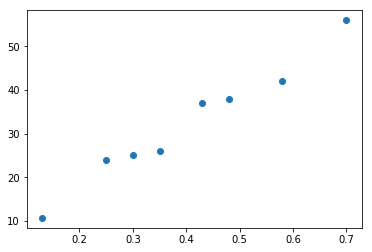

In [5]:
plt.plot(travel_time, distance, 'o')
plt.show()

Now we can easily see that longer distance and more time travelled are linked, but the relationship is not perfect. So with bivariate data we are interested in comparing the two sets of data and finding any relationships. One of the key relationships to find is dependece, that is, if the value of one variable influences the other. The influencer variable is the independent variable and the influenced variable is called the dependent variable.

Classically, the independent variable is that which is manipulated by the researcher.  With such control, accompanied by control of extraneous variables through means such as random assignment of subjects to the conditions, one may interpret the correlation between the dependent variable and the independent variable as resulting from a cause-effect relationship from independent (cause) to dependent (effect) variable. 

#### Linear Regression
The main task of regression analysis is to develop a model representing the matter of a survey as best as possible, and the first step in this process is to find a suitable mathematical form for the model.

Observational data can be analyzed with a linear regression analysis and the results interpreted as representing a cause-effect relationship, but this doesn't always guarantee an unambiguously interpretation with respect to causal relationship. The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line

Let's try to apply a linear regression to the previous example.

In [6]:
A = np.array([ travel_time, np.ones(8)])
w = np.linalg.lstsq(A.T, distance, rcond=None)[0] # obtaining the parameters

# plotting the line
line = w[0]*travel_time+w[1] # regression line
line

array([12.16447695, 21.04635866, 24.74714271, 28.44792675, 34.36918123,
       38.06996527, 45.47153336, 54.35341507])

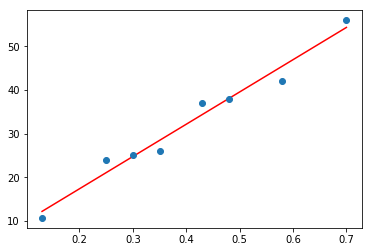

In [7]:
plt.plot(travel_time,line,'r-',travel_time,distance,'o')
plt.show()

Analyzing the previous graph, it can be a linear relantionship between time and distance. This relationship is commonly known as speed.
Using the "point-slope" form of the equation of a straight line:
$$y − y_1 = m(x − x_1)$$
We can re-write it to obtain the slope:
$$m = \frac{y − y_1}{x − x_1}$$
Taking the given points by the linear regression and input two of them in the formula we calculate $m$:
$$m = \frac{54.35 - 12.16}{0.7 - 0.13}$$
$$ m = 74.45$$

So the prediction from the data analysis we performed is that we travelled at a speed of 74.45 Km/h.

### Multivariate Data
Multivariate data typically consist of many records, each with readings on two or more variables, with or without an "outcome" variable of interest. Many times, data are collected on a number of units, and on each unit not just one, many variables are measured, speciﬁcally, different characteristics.

The most common form to display multivariate data is with a table or matrix, where the columns represent a variable and the rows the records. For example the following table that registers the years of education, seniority (in years) and income (in euros) of some employees.

In [8]:
years_education = [2, 2, 3, 4, 4, 5, 5, 6]
seniority = [1, 5, 3, 2, 4, 2, 5, 5]
income = [20000, 40000, 30000, 35000, 40000, 42000, 50000, 70000]
employees = {'years education': years_education,
        'seniority': seniority,
         'income': income}
employees = pd.DataFrame(employees, columns=['years education', 'seniority', 'income'])
employees

,years education,seniority,income
0,2,1,20000
1,2,5,40000
2,3,3,30000
3,4,2,35000
4,4,4,40000
5,5,2,42000
6,5,5,50000
7,6,5,70000


In univariate regression the predicted values are a constant.  You have a point in one-dimensional space.  In bivariate regression the predicted values form a straight line regression surface in two-dimensional space.  In trivariate regression the predicted values form a plane in three dimensional space.
![title](images/multivariateplane.png)
When there are more than three variables, it is said that the regression is represented in hyperspace. Since the difficulty to plot in more than three dimensons, what happens usually is that the regression is displayed on a proyection on smaller space, for example a projection on a 2D space or plane.

What all of this has to do with the iris dataset? The iris dataset is a multivariate dataset because for each iris flower observed Fisher took measurements of different features. These features were (in centimeters):
* sepal length
* sepal width
* petal length
* petal width  

He also added a fifth column for indicating which species the flower belongs to:
* class: virginica, versicolor or setosa

Let's take a look at the tabular representation of the iris data set

In [9]:
# Load the iris data set from a URL.
df = pd.read_csv("https://github.com/ianmcloughlin/datasets/raw/master/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


The idea of Fisher was to be able to classify correctly any iris flower knowing its sepal length, sepal width, petal length and petal width. But is there any relationship or dependence between these variables? Which are the independent variables? Which ones are the depedent variables?

Let's create a pair plot, where each variable is plotted against the other three. 

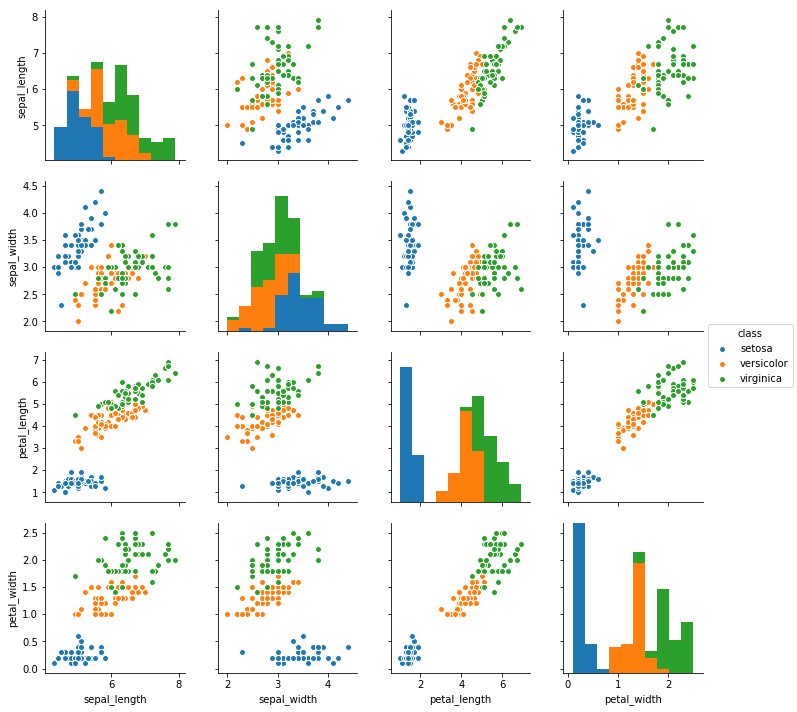

In [10]:
# Load the seaborn package.
import seaborn as sns

# Plot the Iris data set with a pair plot.
sns.pairplot(df, hue="class")

This type of image is also called a Draftsman's display - it shows the possible two-dimensional projections of multidimensional data (in this case, four dimensional). An actual engineer might use this to represent three dimensional physical objects.
It looks like most of the variables could be used to predict the species - except that using the sepal length and width alone would make distinguishing Iris versicolor and virginica tricky (orange and green).

Let's try to apply linear regression on some of those plots. First we try petal length vs petal width

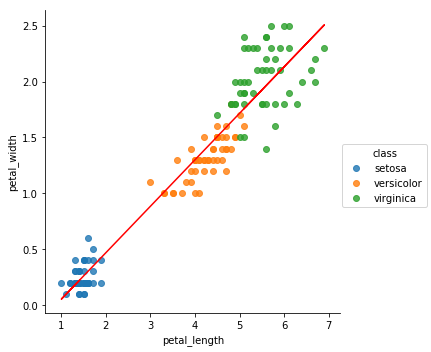

In [46]:
A = np.array([ df['petal_length'], np.ones(df['petal_length'].size)])
w = np.linalg.lstsq(A.T, df['petal_width'], rcond=None)[0] # obtaining the parameters

# plotting the line
line = w[0]*df['petal_length']+w[1] # regression line

ax = sns.lmplot(x='petal_length', y='petal_width', hue='class', data=df, fit_reg=False)
plt.plot(df['petal_length'],line,'r-')
plt.show()

The above graph seems to behave accordingly to a linear regression. It is possible to classify setosas from versicolors and virginicas. Nevertheless, is important to point out that is not the case between veriscolors and virginicas. Notice that a few versicolors are in virginica sector and viceversa. So, far we can classify setosas successfuly using this model but there is space for errors or 'false positives' classifying virginicas and versicolors.

Let's try with another graph, this time sepal length versus sepal width

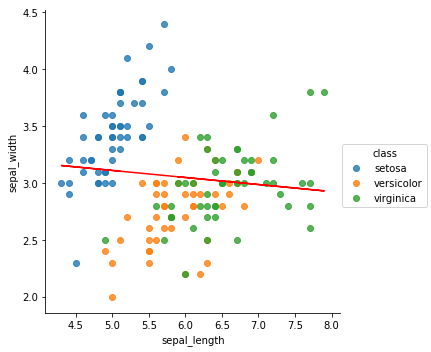

In [47]:
A = np.array([ df['sepal_length'], np.ones(df['sepal_length'].size)])
w = np.linalg.lstsq(A.T, df['sepal_width'], rcond=None)[0] # obtaining the parameters

# plotting the line
line = w[0]*df['sepal_length']+w[1] # regression line

ax = sns.lmplot(x='sepal_length', y='sepal_width', hue='class', data=df, fit_reg=False)
plt.plot(df['sepal_length'],line,'r-')
plt.show()

This time the linear model is not the best fit. Almost it gives back a constant value, like if it  an univariate dataset. And it is not clear the spaces or values to classify one specie from another. The sepal witdh, set up as a dependent variable of the sepal lenth, takes similar values for the three species. There are no conclusive values in the sepal lenght - sepal width relationship to classify the species.

So, the question arises: is there a way, model or technique that let us classify unequivocally these three species?

The answer to this question has led the way to use a neural network based classifier that solves the problem. The iris dataset is often used to demonstrate simple machine learning techniques. It turns out that this dataset is used to try to make a computer predict which specimens (in rows) belonged to each species of Iris flower. This sort of problem was up in the air in the time before genetics was used to classify living beings. At the time, scientists depended on what these species looked like in order to make the distinctions (on why this is wrong that's out of scope of this notebook).